### IMPORTING NECESSARY LIBRARIES

In [22]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv(r"D:\SATYAM\DS_Assignment\daily_offers.csv")

In [25]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [27]:
df.shape

(181673, 14)

In [28]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

### Initial Statistical description of the dataframe

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


## EDA  step 1

#### 1. Checking for duplicated values

In [30]:
df.duplicated().sum()

0

#### 2. Checking for NULL values

In [31]:
df.isnull().sum().sort_values(ascending = False)

material_ref     77919
country             28
application         24
id                   2
status               2
item_date            1
customer             1
thickness            1
delivery date        1
selling_price        1
quantity tons        0
item type            0
width                0
product_ref          0
dtype: int64

#### Dropping columns with too many null values to have a correct analysis and those insignificant for the analysis

In [32]:
df.drop('material_ref',axis = 1,inplace = True)  # too many null values in this columns to have a correct analysis
df.drop(['id', 'product_ref'], axis=1, inplace=True)

#### Renaming columns into proper titles

In [33]:
df.rename(columns = {'quantity tons': 'quantity_in_tons','customer':'customer_id','country':'country_id','item type':'item_type','delivery date':'delivery_date'},inplace = True)

#### item_date and delievery_date are in float dtype. Converting to proper datetime format

In [34]:
df['item_date'] = pd.to_datetime(df['item_date'].astype(str).str.rstrip('.0'), format='%Y%m%d', errors = 'coerce')
df['delivery_date'] = pd.to_datetime(df['delivery_date'].astype(str).str.rstrip('.0'), format='%Y%m%d', errors = 'coerce')

#### Assuming that item_date refers to the date of purchase we're calculating the number of days it took for delievery

In [35]:
df['days_to_delivery'] = (pd.to_datetime(df['delivery_date']) - pd.to_datetime(df['item_date'])).dt.days

In [37]:
(df['days_to_delivery']>0).sum()  # number of positive values

165100

In [38]:
(df['days_to_delivery']<0).sum()  # number of negative values

15945

#### Removing negative values from the days to delievery

In [39]:
df= df.loc[df['days_to_delivery']>=0]

#### Quantity in tons columns is in object dtype. Converting to float

In [40]:
df['quantity_in_tons'] = pd.to_numeric(df['quantity_in_tons'], errors='coerce')

## EDA step 2
#### Outlier check for numeric non-categorical variables

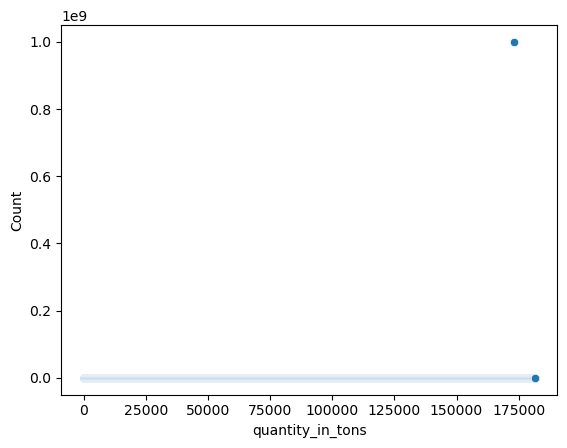

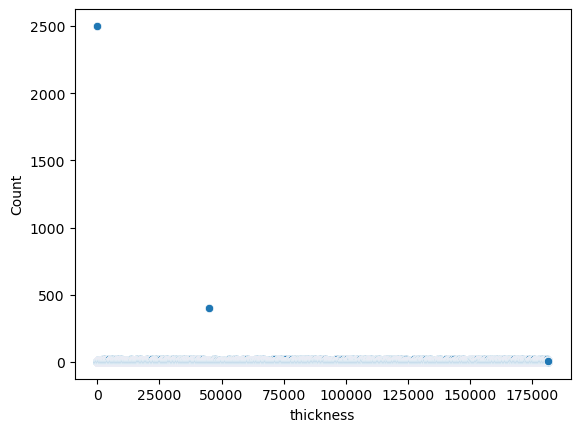

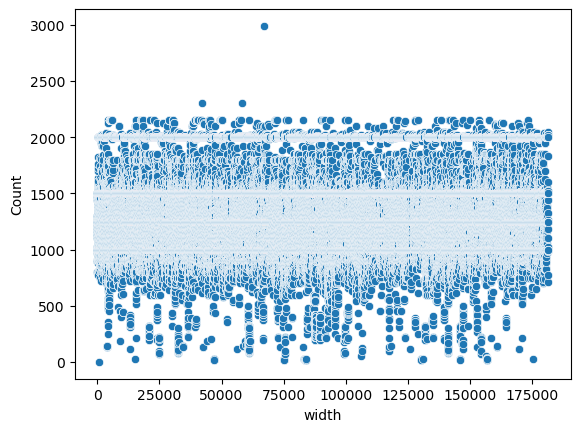

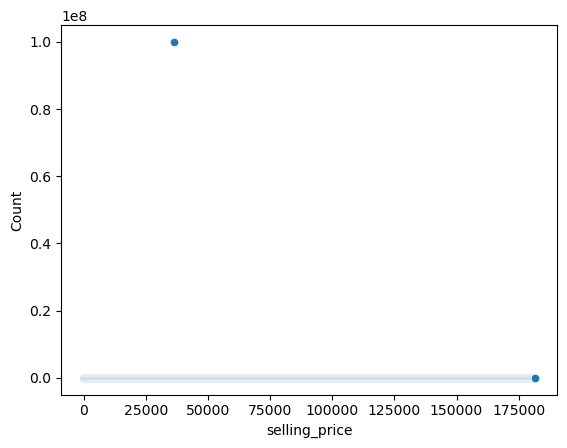

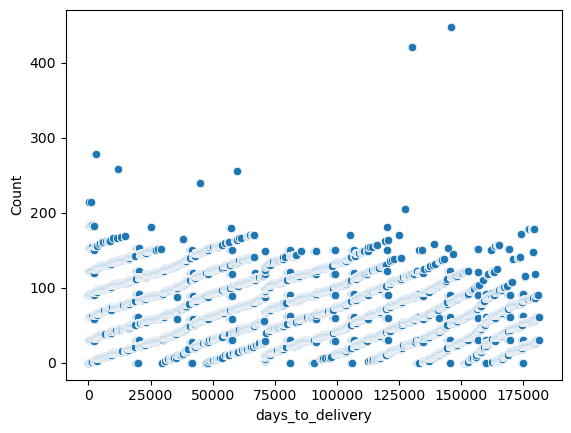

In [42]:
for i in ['quantity_in_tons','thickness','width','selling_price','days_to_delivery']:
    sns.scatterplot(data = df[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show();


#### Treatment of outliers

In [43]:
def remove_outlier_zscore(col, threshold=3):
    z_scores = (col - col.mean()) / col.std()
    abs_z_scores = np.abs(z_scores)
    good_values = abs_z_scores < threshold
    return col[good_values]

for column in ['quantity_in_tons','thickness','selling_price']:
    df[column] = remove_outlier_zscore(df[column])

#### Outlier check after treatment

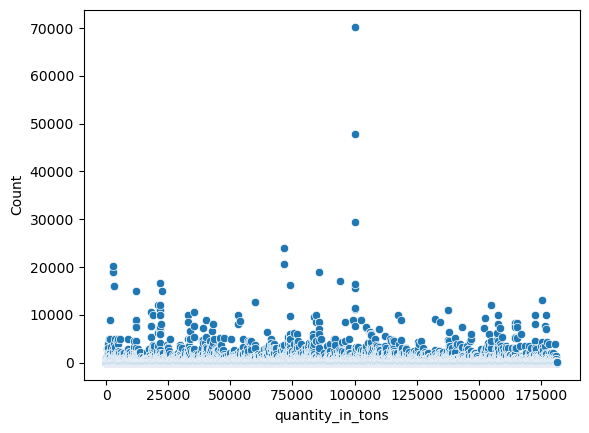

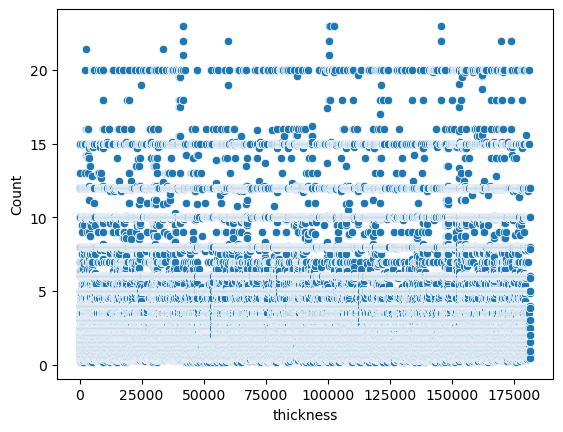

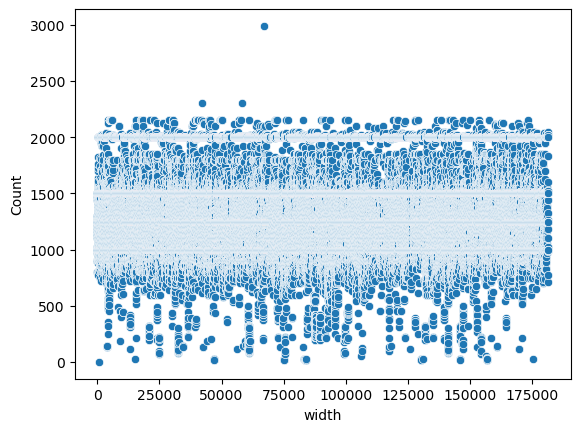

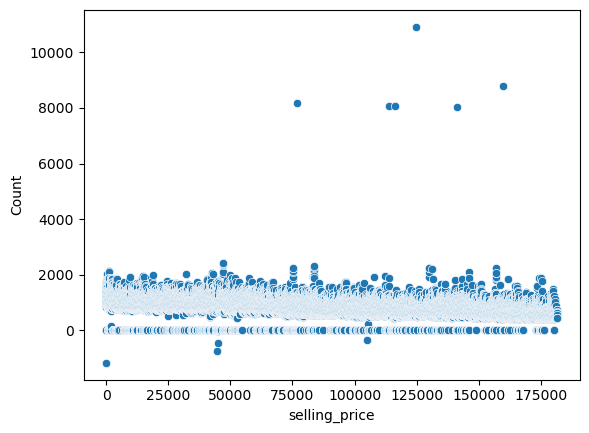

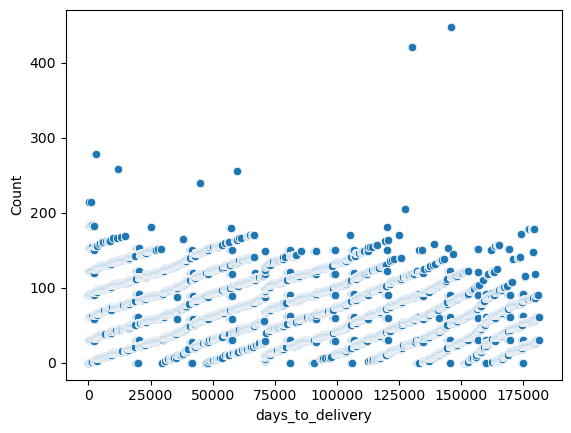

In [44]:
for i in ['quantity_in_tons','thickness','width','selling_price','days_to_delivery']:
    sns.scatterplot(data = df[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show();

#### Checking for null values again

In [45]:
df.isnull().sum().sort_values(ascending = False)

thickness           40
country_id          28
application         24
quantity_in_tons     2
status               2
selling_price        2
customer_id          1
item_date            0
item_type            0
width                0
delivery_date        0
days_to_delivery     0
dtype: int64

#### We'll remove the null values in categoraical variables as substituting them with mean, median or mode would be inappropriate

In [46]:
df.dropna(subset=['country_id', 'application','status','customer_id'], inplace = True)

In [47]:
df.isnull().sum().sort_values(ascending = False)

thickness           40
quantity_in_tons     2
selling_price        2
item_date            0
customer_id          0
country_id           0
status               0
item_type            0
application          0
width                0
delivery_date        0
days_to_delivery     0
dtype: int64

#### For the numeric non-categorical columns quantity_in_tons, thickness and selling_price, we substitute them with median

In [48]:
df.fillna(df.median(),inplace = True)

In [49]:
df.isnull().sum().sort_values(ascending = False)

item_date           0
quantity_in_tons    0
customer_id         0
country_id          0
status              0
item_type           0
application         0
thickness           0
width               0
delivery_date       0
selling_price       0
days_to_delivery    0
dtype: int64

#### Statistical description of the dataset using numeric non categorical values

In [50]:
dfn = df[['quantity_in_tons','thickness','width','selling_price','days_to_delivery']]
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_in_tons,165691.0,94.308652,419.971608,-4.00,11.385575,30.543593,67.036763,70252.36307
thickness,165691.0,2.599386,2.839820,0.18,0.740000,1.500000,3.000000,23.00000
width,165691.0,1300.941580,262.043469,1.00,1180.000000,1250.000000,1500.000000,2990.00000
selling_price,165691.0,823.436375,230.160797,-1160.00,676.000000,817.000000,958.000000,10913.00000
days_to_delivery,165691.0,69.566446,39.532562,0.00,35.000000,66.000000,102.000000,448.00000


#### Correlation among the above attributes of the dataset

In [51]:
dfn.corr()

,quantity_in_tons,thickness,width,selling_price,days_to_delivery
quantity_in_tons,1.000000,0.007634,-0.000542,-0.024228,-0.002816
thickness,0.007634,1.000000,0.385157,-0.271930,0.059405
width,-0.000542,0.385157,1.000000,-0.170149,0.018596
selling_price,-0.024228,-0.271930,-0.170149,1.000000,0.252800
days_to_delivery,-0.002816,0.059405,0.018596,0.252800,1.000000


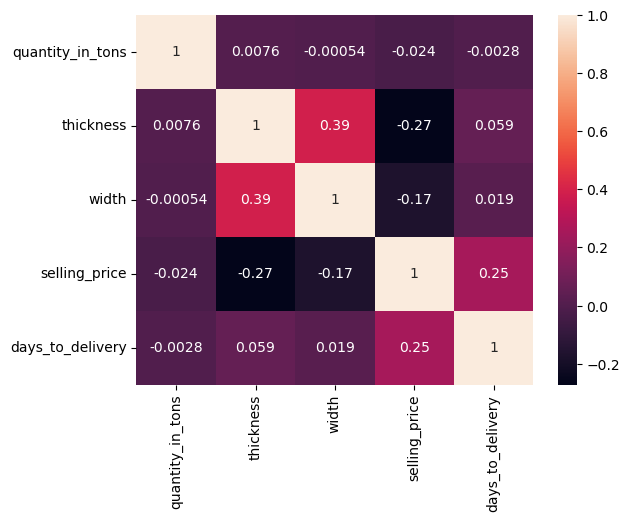

In [52]:
corr_matrix = dfn.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show();

#### Creating new date time columns

In [53]:
df['month'] = pd.DatetimeIndex(df['delivery_date']).month
df['year'] = pd.DatetimeIndex(df['delivery_date']).year


#### Dropping original date columns

In [54]:
df.drop(['item_date', 'delivery_date'], axis=1, inplace=True)

In [55]:
df.head(10)

,quantity_in_tons,customer_id,country_id,status,item_type,application,thickness,width,selling_price,days_to_delivery,month,year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,854.0,91.0,7,2021
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1047.0,0.0,4,2021
5,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,983.0,0.0,4,2021
6,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,18.0,91.0,7,2021
8,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1363.0,91.0,7,2021
9,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,983.0,0.0,4,2021
10,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,17.0,91.0,7,2021
12,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,1098.0,91.0,7,2021
13,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,973.0,91.0,7,2021
14,10.411350,30271717.0,28.0,To be approved,W,10.0,0.60,1250.0,1258.0,91.0,7,2021


## Model Impelementation

#### Generating Training and Testing sets

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
y = df['selling_price']                 # Target variable
X = df.drop('selling_price',axis = 1) # Feature variables
X = pd.get_dummies(X, columns=['status', 'item_type', 'application']) # Encode categorical variables using one-hot encoding

#### Split the data into train and test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Building regression models

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [60]:
models = [LinearRegression(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
         XGBRegressor(random_state=42)]

#### Looping through the models to fit and score them

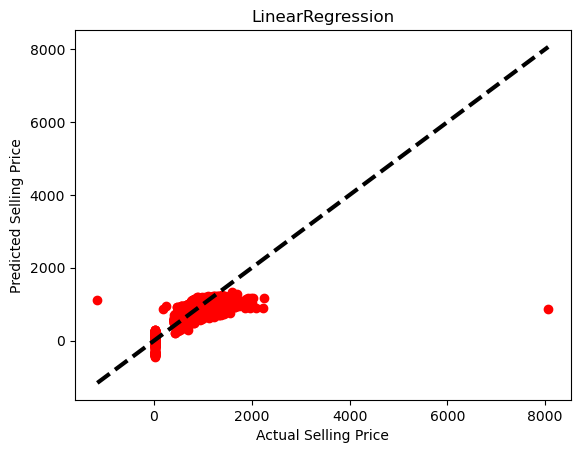

LinearRegression: 0.6556430920216825


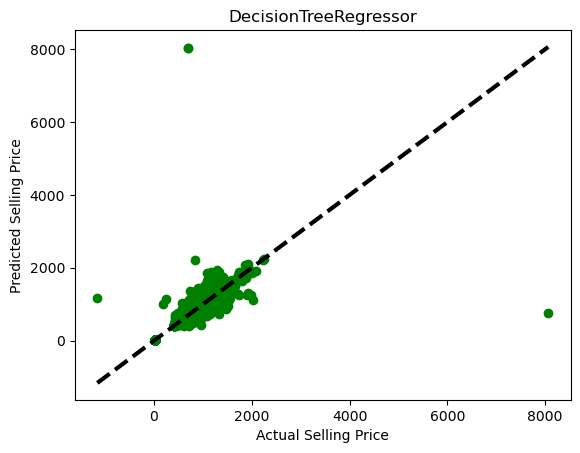

DecisionTreeRegressor: 0.7174584283141754


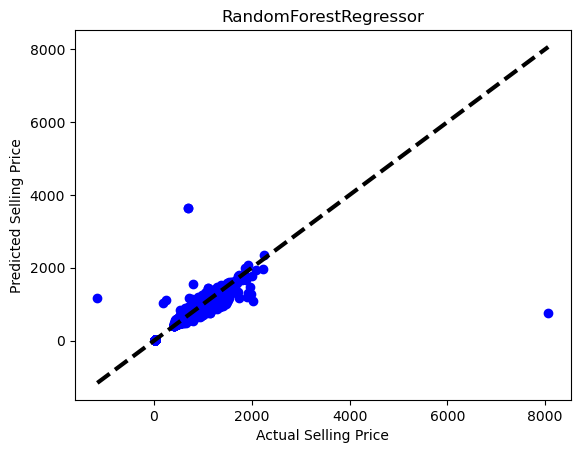

RandomForestRegressor: 0.8583105663823849


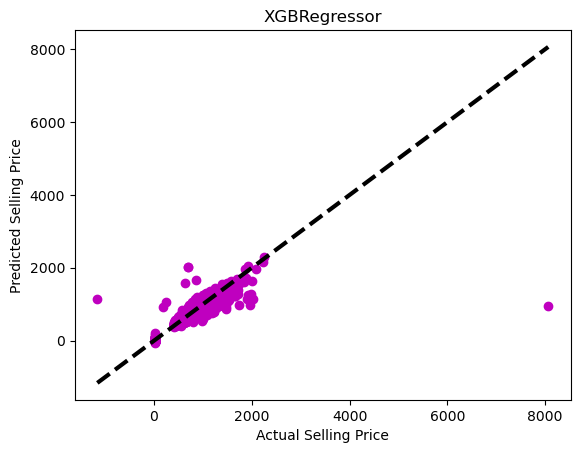

XGBRegressor: 0.8504255528300255



The best model is RandomForestRegressor with a score of 0.858


In [61]:
# Defining the colors to use for each model
colors = ['r', 'g', 'b', 'm']

best_score = -np.inf  # initialize the best score as negative infinity
best_model = ''

for i,model in enumerate(models):
    
    model.fit(X_train, y_train)
    
    # Getting the predicted values on the testing set
    y_pred = model.predict(X_test)

    # Plotting the predicted vs. actual values
    plt.scatter(y_test, y_pred,c=colors[i])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title(f'{type(model).__name__}')
    plt.show();
    
    score = model.score(X_test, y_test)  # computes the score on the testing set
    if score > best_score:  # checks if this model has a better score than the previous best model
        best_score = score
        best_model = type(model).__name__
    
    print(f'{type(model).__name__}: {score}')
    
print('\n\n')    
print(f'The best model is {best_model} with a score of {best_score:.3f}')

#### Hyperparameter tuning the best regression model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid for the Random Forest Regressor
param_grid = {'n_estimators': [50, 100, 200, 300],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10]}

# Creating a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Creating a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fitting the GridSearchCV object to the training set
grid_search.fit(X_train, y_train)


best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Best Estimator: {best_estimator}')
print(f'Best Parameters: {best_params}')
print(f'Best Score: {grid_search.best_score_}')


#### 	Evaluating the best model using the metric r2 score on the testing set.

In [ ]:
from sklearn.metrics import r2_score

# Evaluating the best model on the testing set using R-squared
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared score on the testing set: {r2:.3f}")
